
# <br/><br/><br/> Lithological facies classification using machine learning for reservoir characterization

### *Fan Xia*

#### Last edited on 07/25/22 by Fan X.

### Introduction

#### Use of <u>Random Forest</u> (RF) for lithological facies classification and prediction.

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Data preparation
#### Data preparation includes reading raw data from disk that are used for model building, QC, cleanning up missing data and creating clean dataset for machine learning methodology.

In [6]:
# Load well log data with facies from disk
filename = './data/facies_vectors.csv'
raw_data = pd.read_csv(filename)
raw_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [7]:
# Summarize raw dataset
raw_data.count()
raw_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [8]:
# QC raw dataset
raw_data.groupby('Well Name').count()

,Facies,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Well Name,,,,,,,,,,
ALEXANDER D,466,466,466,466,466,466,466,0,466,466
CHURCHMAN BIBLE,404,404,404,404,404,404,404,404,404,404
CROSS H CATTLE,501,501,501,501,501,501,501,501,501,501
KIMZEY A,439,439,439,439,439,439,439,0,439,439
LUKE G U,461,461,461,461,461,461,461,461,461,461
NEWBY,463,463,463,463,463,463,463,463,463,463
NOLAN,415,415,415,415,415,415,415,415,415,415
Recruit F9,80,80,80,80,80,80,80,68,80,80
SHANKLE,449,449,449,449,449,449,449,449,449,449


In [9]:
# QC missing data
raw_data[raw_data['PE'].isnull()]['Well Name'].unique()
raw_data[raw_data['PE'].isnull()].groupby('Well Name').count()

,Facies,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Well Name,,,,,,,,,,
ALEXANDER D,466,466,466,466,466,466,466,0,466,466
KIMZEY A,439,439,439,439,439,439,439,0,439,439
Recruit F9,12,12,12,12,12,12,12,0,12,12


In [10]:
# Cleanup raw data and create clean data
clean_data = raw_data.dropna()
clean_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [11]:
# QC clean dataset
clean_data['Well Name'].unique()
clean_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


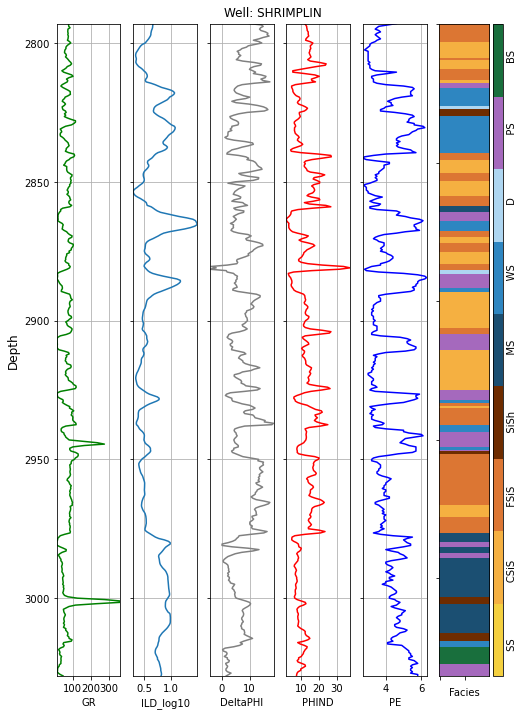

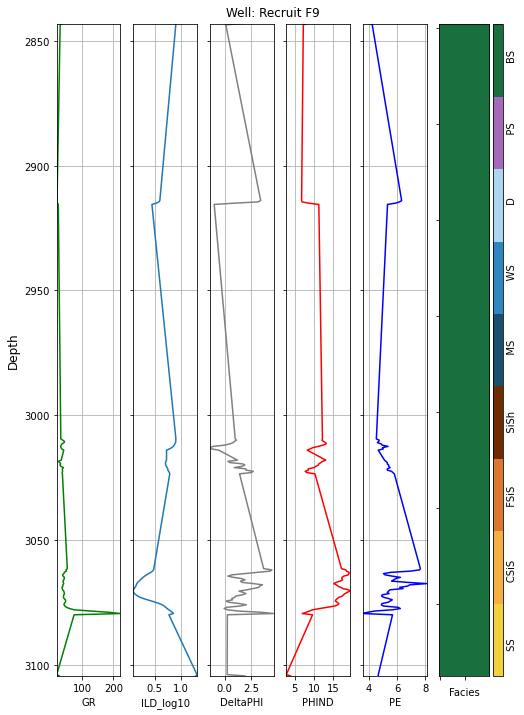

In [12]:
# Plot clean dataset
# SS - nonmarine sandstone   CSiS - nonmarine coarse siltstone   FSis - nonmarine fine siltstone
# SiSh - marine siltstone and shale   MS - mudstone (limestone)   WS - wackestone (limestone)
# D - dolomite   PS - packstone (limestone)   BS - bafflestone (limestone)
facies_labels = [' SS ', 'CSiS', 'FSiS', 'SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

#plot_clean_data(clean_data[clean_data['Well Name'] == 'SHRIMPLIN'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'SHANKLE'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'LUKE G U'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'CROSS H CATTLE'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'NOLAN'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'Recruit F9'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'NEWBY'], facies_labels, facies_colors)
#plot_clean_data(clean_data[clean_data['Well Name'] == 'CHURCHMAN BIBLE'], facies_labels, facies_colors)

plot_data(clean_data[clean_data['Well Name'] == 'SHRIMPLIN'], ['Facies'], facies_labels, facies_colors)
plot_data(clean_data[clean_data['Well Name'] == 'Recruit F9'], ['Facies'], facies_labels, facies_colors)

### Create training data and blind test data

In [13]:
# Use of well SHANKLE as a blind test
training_data = clean_data[clean_data['Well Name'] != 'SHANKLE']
blind_data = clean_data[clean_data['Well Name'] == 'SHANKLE']

training_data['Well Name'].unique()
len(training_data['Well Name'].unique())
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


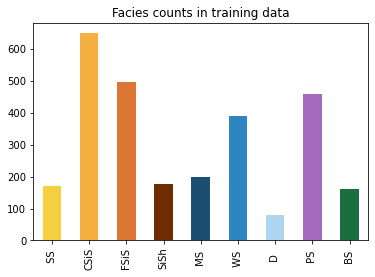

In [14]:
# Plot the counts for each facies in training data
facies_entry = len(clean_data['Facies'].unique())

facies_count_training = pd.Series(np.repeat(0, facies_entry), index = np.arange(1, facies_entry + 1, 1))
facies_count_training.update(training_data['Facies'].value_counts().sort_index())
facies_count_training.index = facies_labels
facies_count_training.plot(kind = 'bar', color = facies_colors, title = 'Facies counts in training data')

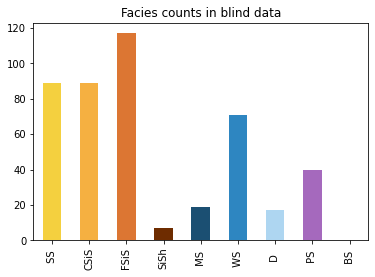

In [15]:
# Plot the counts for each facies in blind data
facies_entry = len(clean_data['Facies'].unique())

facies_count_blind = pd.Series(np.repeat(0, facies_entry), index = np.arange(1, facies_entry + 1, 1))
facies_count_blind.update(blind_data['Facies'].value_counts().sort_index())
facies_count_blind.index = facies_labels
facies_count_blind.plot(kind = 'bar', color = facies_colors, title = 'Facies counts in blind data')

### Condition the training data

In [16]:
# Create predictor variables and outcome variable
predictors = training_data.drop(['Facies', 'Formation', 'Well Name', 'Depth'], axis = 1)
outcome = training_data['Facies'].values
predictors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,66.249445,0.644637,3.754963,13.118929,3.805693,1.523895,0.523057
std,31.610849,0.241922,5.045916,7.389665,0.894118,0.499518,0.287499
min,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,46.081500,0.497000,1.300000,8.165000,3.200000,1.000000,0.276500
50%,65.541000,0.627000,3.581000,11.900000,3.600000,2.000000,0.529000
75%,80.714000,0.812323,6.500000,16.144000,4.400000,2.000000,0.771500
max,361.150000,1.480000,18.500000,84.400000,8.094000,2.000000,1.000000


In [17]:
predictors

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,78.260,0.661,14.200,12.565,4.100,1,0.979
2,79.050,0.658,14.800,13.050,3.600,1,0.957
3,86.100,0.655,13.900,13.115,3.500,1,0.936
4,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...
4144,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,51.469,0.965,3.083,7.708,3.152,2,0.661


In [18]:
# Standardize the predictors
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(predictors)
scaled_predictors = scaler.transform(predictors)

In [19]:
scaled_predictors.mean(axis = 0)

array([-1.02126157e-17, -2.14464929e-16,  4.08504627e-17,  1.17445080e-16,
       -3.77866780e-16, -4.08504627e-17,  2.80846931e-16])

In [20]:
scaled_predictors.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1.])

### Create training set and test set

In [21]:
# Use of 10% of the predictors for test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_predictors, outcome, test_size = 0.1, random_state = 42)

### Train the RF classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [23]:
y_predicted = clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[16,  7,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 45, 13,  0,  0,  0,  0,  0,  0],
       [ 0, 13, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 14,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  3,  9, 13,  1,  3,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  7,  2],
       [ 0,  0,  0,  1,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  1,  4,  9,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  3, 11]], dtype=int64)

In [25]:
print('Facies prediction accuracy on test set: %f' % accuracy(cm))

Facies prediction accuracy on test set: 0.691756


In [26]:
facies_neighbors = [[2], [1, 3], [2], [5], [4, 6], [5, 7, 8], [6, 8], [6, 7, 9], [7, 8]]
print('Adjusted facies prediction accuracy on test set: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on test set: 0.942652


### Optimize RF parameters by cross validation

In [27]:
model_selection = True

if model_selection:
    from sklearn.model_selection import GridSearchCV
    
    test_max_depth = [2, 3, 5, 10, 20, 50]
    test_min_samples_split = [2, 5, 10, 50, 100, 200]
    
    clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
    grid_search = GridSearchCV(estimator = clf,
                               param_grid = {'max_depth': test_max_depth,
                                             'min_samples_split': test_min_samples_split},
                               cv = 4, n_jobs = -1, verbose = 1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   19.6s finished


In [28]:
grid_search.best_score_

0.7284345047923323

In [29]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [30]:
# Parameters max_depth and min_samples_split in RF
if model_selection:

    n_max_depth = len(test_max_depth)
    n_min_samples_split = len(test_min_samples_split)
    n_cv = n_max_depth * n_min_samples_split
    err_train = np.zeros(n_cv).reshape(n_min_samples_split, n_max_depth)
    err_cv = np.zeros(n_cv).reshape(n_min_samples_split, n_max_depth)

# CV can be implemented by parallel computing
    i_cv = 0
    for j, min_samples_split in enumerate(test_min_samples_split):
        for i, max_depth in enumerate(test_max_depth):
            clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, min_samples_split=min_samples_split,
                                         random_state = 42, n_jobs = -1)
            clf.fit(X_train, y_train)
            
            cm_train = confusion_matrix(y_train, clf.predict(X_train))
            cm_cv = confusion_matrix(y_test, clf.predict(X_test))
            
            err_train[j][i] = accuracy(cm_train)
            err_cv[j][i] = accuracy(cm_cv)
            
            i_cv += 1
            progress = int(i_cv/n_cv*100)
            print('CV progress: {}%'.format(progress), end='\r', flush=True)

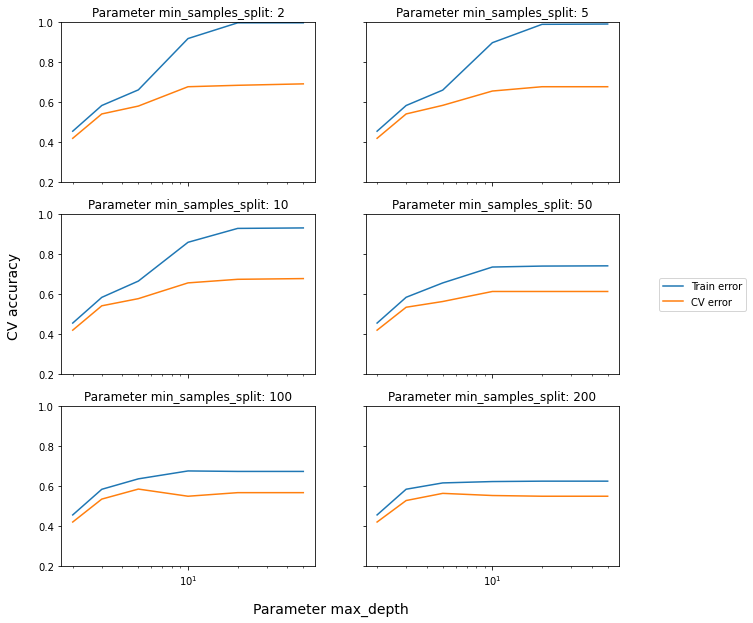

In [31]:
# Plot CV errors vs. train errors for parameter selection
if model_selection:
    n_plot = n_min_samples_split
    
    n_col = 2
    n_row = int(n_plot / n_col)
    
    fig, axes = plt.subplots(n_row, n_col, sharex = 'col', sharey = 'row', figsize = (10, 10))
    
    for i_plot in np.arange(0, n_plot):
        i_row = int(i_plot / n_col)
        i_col = int(i_plot % n_col)
        ax = axes[i_row, i_col]
        ax.set_title('Parameter min_samples_split: %g' % test_min_samples_split[i_plot])
        ax.semilogx(test_max_depth, err_train[i_plot], label = 'Train error')
        ax.semilogx(test_max_depth, err_cv[i_plot], label = 'CV error')
        ax.set_ylim([0.2, 1.0])
        
    ax.legend(bbox_to_anchor = (1.5, 1.7), loc = 'center right', borderaxespad = 0.)
    fig.text(0.5, 0.06, 'Parameter max_depth', ha = 'center', fontsize = 14)
    fig.text(0.05, 0.5, 'CV accuracy', va = 'center', rotation = 'vertical', fontsize = 14)

In [32]:
# Use optimized parameters to run SVM again
clf = RandomForestClassifier(n_estimators = 100, max_depth = 15, min_samples_split = 3, random_state = 42, n_jobs = -1)
clf.fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))

In [33]:
print('Facies prediction accuracy on test set: %f' % accuracy(cm))

Facies prediction accuracy on test set: 0.695341


In [34]:
print('Adjusted facies prediction accuracy on test set: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on test set: 0.949821


### Apply optimized RF model to blind test

In [35]:
blind_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
939,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
940,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
941,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...,...,...,...,...
1381,8,C LM,SHANKLE,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,8,C LM,SHANKLE,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,8,C LM,SHANKLE,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,4,C LM,SHANKLE,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030


### Conditioning the blind data

In [36]:
# Create predictor variables and outcome variable
predictors = blind_data.drop(['Facies', 'Formation', 'Well Name', 'Depth'], axis = 1)
outcome = blind_data['Facies'].values
predictors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,65.431180,0.630831,2.348998,15.741125,3.224944,1.340757,0.503118
std,25.696418,0.241293,6.113543,9.080467,0.732414,0.474493,0.282082
min,18.400000,0.093000,-19.900000,2.890000,1.500000,1.000000,0.010000
25%,54.960000,0.425000,0.100000,9.150000,2.700000,1.000000,0.258000
50%,66.600000,0.620000,2.600000,13.935000,3.100000,1.000000,0.500000
75%,75.150000,0.817000,6.200000,18.575000,3.600000,2.000000,0.744000
max,242.750000,1.311000,18.600000,55.915000,5.400000,2.000000,1.000000


In [37]:
# Standardize the predictors
X_blind = scaler.transform(predictors)
y_blind = outcome

### Blind test using RF model

In [38]:
y_predict = clf.predict(X_blind)
cm = confusion_matrix(y_blind, y_predict)

In [39]:
print('Facies prediction accuracy on blind test: %f' % accuracy(cm))

Facies prediction accuracy on blind test: 0.521158


In [40]:
print('Adjusted facies prediction accuracy on blind test: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on blind test: 0.959911


<ipython-input-41-a1700add58f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind_data['Predict'] = y_predict


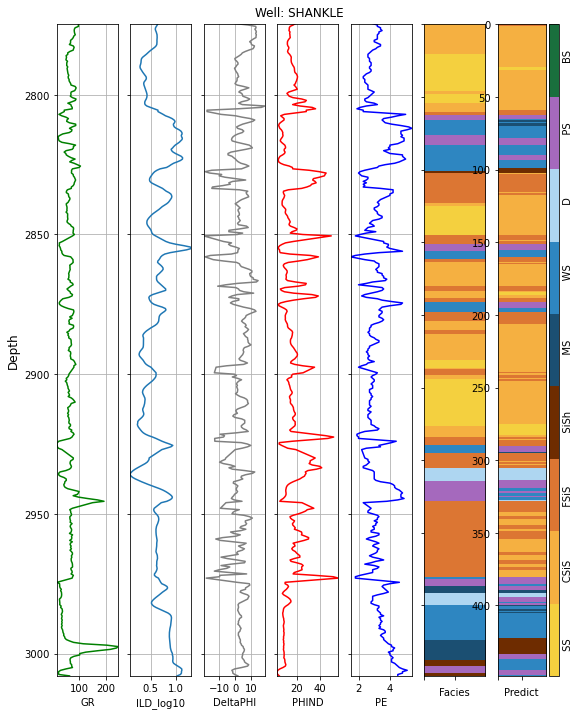

In [41]:
# Plot the predict facies vs. the true facies
blind_data['Predict'] = y_predict
plot_data(blind_data, ['Facies', 'Predict'], facies_labels, facies_colors)

### Apply optimized RF model to new test data

In [42]:
# Load well log data without facies from disk
filename = './data/validation_data_nofacies.csv'
test_data = pd.read_csv(filename)
test_data

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911
...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556


### Conditioning the test data

In [43]:
# Create predictor variables and outcome variable
predictors = test_data.drop(['Formation', 'Well Name', 'Depth'], axis = 1)
predictors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,57.61173,0.666312,2.851964,11.655277,3.654178,1.678313,0.535807
std,27.52774,0.288367,3.442074,5.190236,0.649793,0.467405,0.283062
min,12.03600,-0.468000,-8.900000,1.855000,2.113000,1.000000,0.013000
25%,36.77325,0.541000,0.411250,7.700000,3.171500,1.000000,0.300000
50%,58.34450,0.675000,2.397500,10.950000,3.515500,2.000000,0.547500
75%,73.05150,0.850750,4.600000,14.793750,4.191500,2.000000,0.778000
max,220.41300,1.507000,16.500000,31.335000,6.321000,2.000000,1.000000


### Prediction using RF model

In [44]:
# Standardize the predictors
X_unknown = scaler.transform(predictors)
y_unknown = clf.predict(X_unknown)

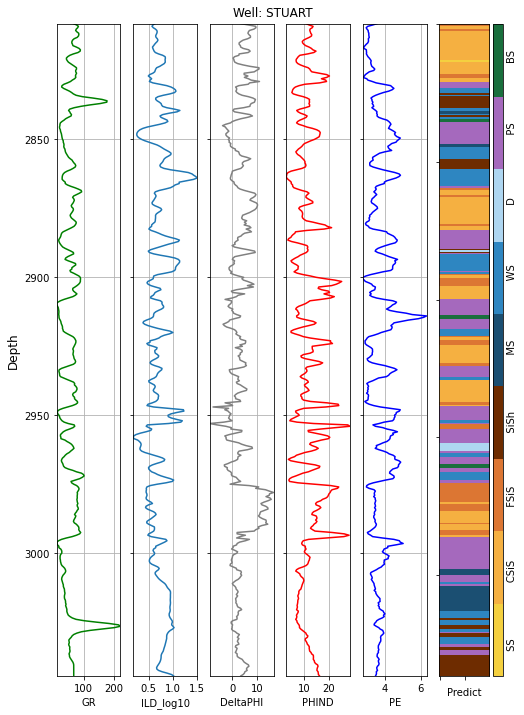

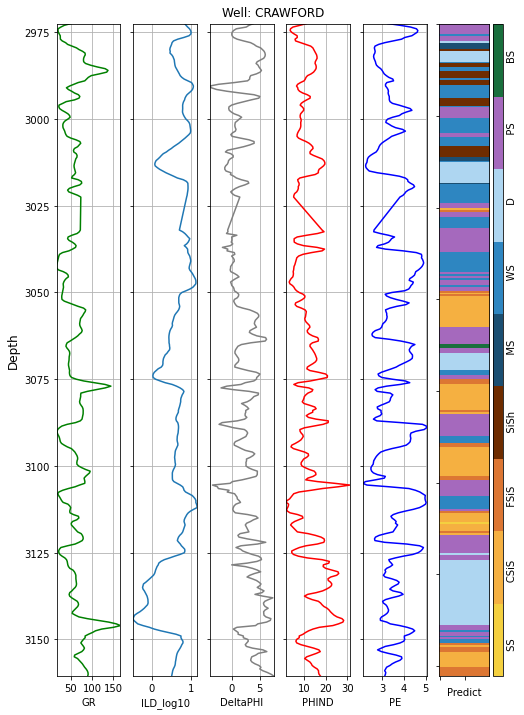

In [45]:
# Plot the predict facies for two wells
test_data['Predict'] = y_unknown
plot_data(test_data[test_data['Well Name'] == 'STUART'], ['Predict'], facies_labels, facies_colors)
plot_data(test_data[test_data['Well Name'] == 'CRAWFORD'], ['Predict'], facies_labels, facies_colors)

In [46]:
# Write result to disk
filename = './data/result_rfc.csv'
test_data.to_csv(filename)

### Supplemental functions

In [1]:
# This function plots clean dataset
# Arguments:
#     data      input clean dataset
#     label     input facies names
#     color     input facies colors
def plot_clean_data(data, label, color):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = data.sort_values(by = 'Depth')
    name = data.columns.values
    cmap = colors.ListedColormap(color[0:len(color)], 'indexed')
    
    zmin = data.Depth.min()
    zmax = data.Depth.max()
    
    panel = np.repeat(np.expand_dims(data.Facies.values, 1), 100, 1)
    
    f, ax = plt.subplots(nrows = 1, ncols = 6, figsize = [8, 12])
    ax[0].plot(data.GR, data.Depth, '-g')
    ax[1].plot(data.ILD_log10, data.Depth, '-')
    ax[2].plot(data.DeltaPHI, data.Depth, '-', color = '0.5')
    ax[3].plot(data.PHIND, data.Depth, '-r')
    ax[4].plot(data.PE, data.Depth, '-b')
    im = ax[5].imshow(panel, interpolation = 'none', aspect = 'auto', cmap=cmap, vmin=1, vmax=9)
    
    legend = make_axes_locatable(ax[5])
    cax = legend.append_axes('right', size = '20%', pad = 0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(label))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')
    
    for i in range(len(ax) - 1):
        ax[i].set_ylim(zmin, zmax)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
        ax[i].set_xlabel(name[i + 4])
        ax[i].set_xlim(data[name[i + 4]].min(), data[name[i + 4]].max())
        ax[i + 1].set_yticklabels([])
    ax[5].set_xlabel('Facies')
    ax[5].set_xticklabels([])
    ax[0].set_ylabel('Depth', fontsize = 12)
    
    f.suptitle('Well: %s' % data['Well Name'].unique()[0], fontsize = 12, y = 0.9)

In [2]:
# This function plots log dataset
# Arguments:
#     data      input clean dataset
#     vars      input variables to compare (e.g. ['Facies', 'Predictions'])
#     label     input facies names
#     color     input facies colors
def plot_data(data, vars, label, color):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = data.sort_values(by = 'Depth')
    name = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
    cmap = colors.ListedColormap(color[0:len(color)], 'indexed')
    
    zmin = data.Depth.min()
    zmax = data.Depth.max()
    
    panel = {}
    for i, var in enumerate(vars):
        panel[i] = np.repeat(np.expand_dims(data[var].values, 1), 100, 1)
        
    m = len(name)
    nvars = len(vars)
    
    f, ax = plt.subplots(nrows = 1, ncols = m + nvars, figsize = [7 + nvars, 12])
    ax[0].plot(data[name[0]], data.Depth, '-g')
    ax[1].plot(data[name[1]], data.Depth, '-')
    ax[2].plot(data[name[2]], data.Depth, '-', color = '0.5')
    ax[3].plot(data[name[3]], data.Depth, '-r')
    ax[4].plot(data[name[4]], data.Depth, '-b')
    
    im = {}
    for i in range(nvars):
        im[i] = ax[m + i].imshow(panel[i], interpolation = 'none', aspect = 'auto', cmap = cmap, vmin = 1, vmax = 9)
    
    legend = make_axes_locatable(ax[m + nvars - 1])
    cax = legend.append_axes('right', size = '20%', pad = 0.05)
    cbar = plt.colorbar(im[0], cax = cax)
    cbar.set_label((17*' ').join(label))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')
    
    for i in range(len(ax) - nvars):
        ax[i].set_ylim(zmin, zmax)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
        ax[i].set_xlabel(name[i])
        ax[i].set_xlim(data[name[i]].min(), data[name[i]].max())
        ax[i + 1].set_yticklabels([])
        
    for i, var in enumerate(vars):
        ax[m + i].set_xlabel(var)
        ax[m + i].set_xticklabels([])
        
    ax[0].set_ylabel('Depth', fontsize = 12)
    
    f.suptitle('Well: %s' % data['Well Name'].unique()[0], fontsize = 12, y = 0.9)

In [3]:
# This function returns the classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
def accuracy(cm):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
    result = n_correct/sum(sum(cm))
    return result

# This function returns the adjusted classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
#     adj      adjacent facies
def accuracy_adj(cm, adj):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
        for j in adj[i]:
            if j - 1 < n_class: n_correct += cm[i][j - 1]
    result = n_correct/sum(sum(cm))
    return result